# Health Insurance Cross Sell Prediction

**Predict Health Insurance Owners' who will be interested in Vehicle Insurance**

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Importing  Required Libreries

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

## 1. Data Collection & Data Overview

In [2]:
data=pd.read_csv("health_insurance.csv")

In [3]:
# show first 5 rows of the dataset

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Check the shape of the dataset

data.shape

(381109, 12)

**Dataset has 381109 rows and 12 columns**

In [5]:
# Check for missing values

data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**There is no missing value peresent in the dataset**

In [6]:
# Check info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Checking how many categarical and numerical columns in the dataset**

In [7]:
categarical = [var for var in data.columns if data[var].dtype == 'O']

print("there are {} categarical column in the dataset\n".format(len(categarical)))
print("Following are the categarical features :\n",categarical)

there are 3 categarical column in the dataset

Following are the categarical features :
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [8]:
numerical = [var for var in data.columns if data[var].dtype != 'O']

print("there are {} numerical column in the dataset\n".format(len(numerical)))
print("Following are the numerical features :\n",numerical)

there are 9 numerical column in the dataset

Following are the numerical features :
 ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


## 2. Data Visualization

### Distribution of Target variable

In [9]:
from IPython.display import clear_output as cls

0    334399
1     46710
Name: Response, dtype: int64


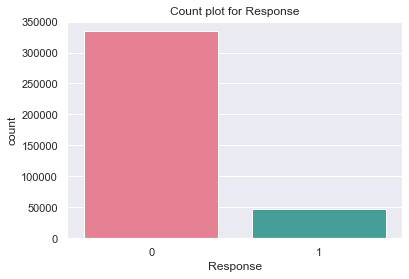

In [10]:
sns.countplot(data['Response'], data=data, palette='husl')
plt.title('Count plot for Response')
cls()

T_val_count = data['Response'].value_counts()
print(T_val_count)

* 1 - Customer is interested

* 2 - Customer is not interested

**The data is highly Imbalanced**

### Gender column

Male      206089
Female    175020
Name: Gender, dtype: int64


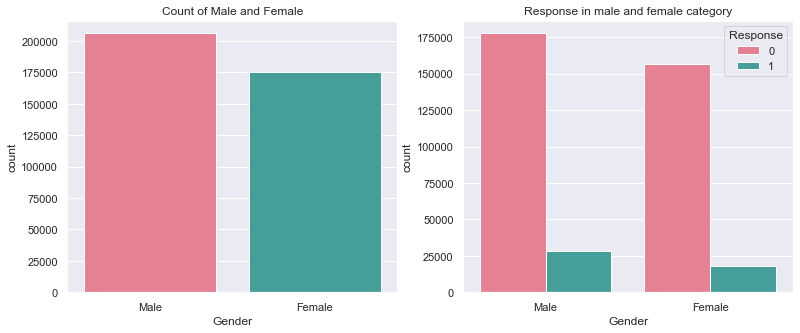

In [11]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'], palette='husl')
plt.title("Count of Male and Female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue=data['Response'], palette='husl')
plt.title('Response in male and female category')
cls()

G_val_count = data['Gender'].value_counts()
print(G_val_count)

* The gender variable in the dataset is almost equally distributed.
* Male category is slightly greater than that of female and chances of buying the insurance is also little high.

### Age Vs Response

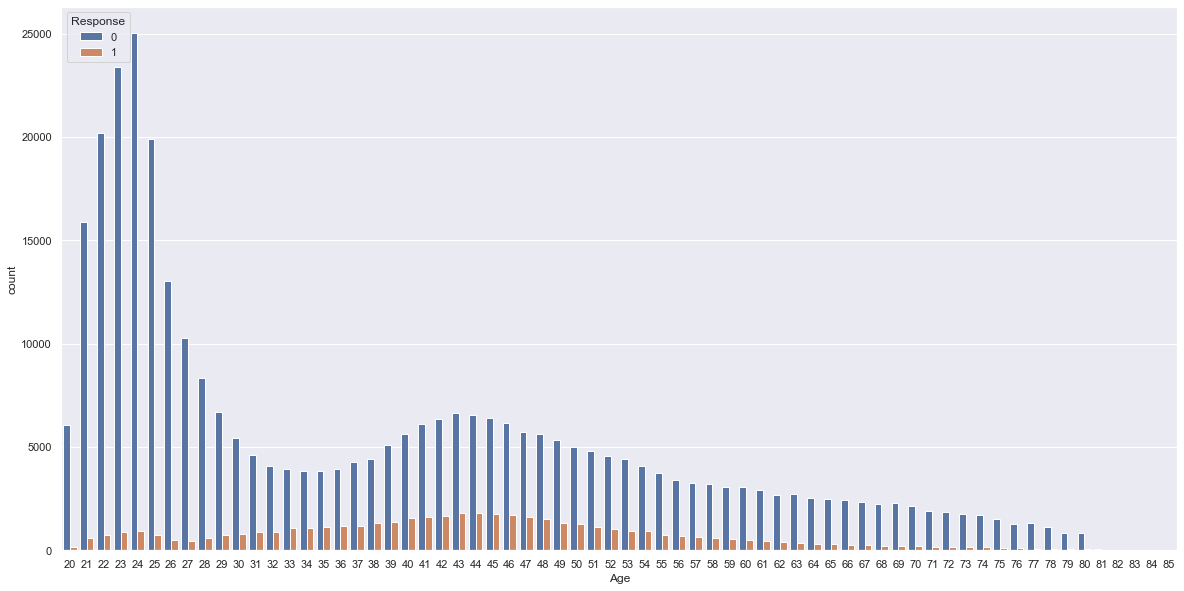

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue='Response', data=data)
cls()

* In range of age 38 to 48 are more interested 

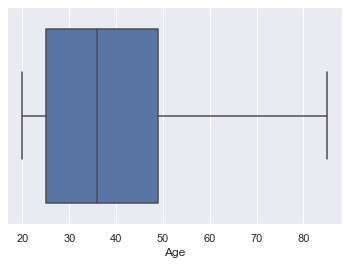

In [13]:
sns.boxplot(data['Age'])
cls()

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the data.

### Driving License

1    380297
0       812
Name: Driving_License, dtype: int64


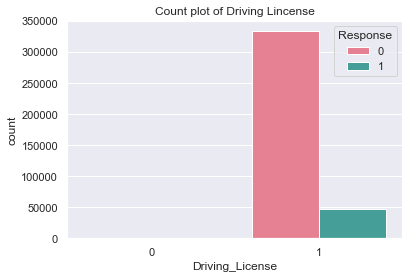

In [14]:
sns.countplot(data['Driving_License'],hue=data['Response'], palette='husl')
plt.title('Count plot of Driving Lincense')
cls()

D_val_count = data['Driving_License'].value_counts()
print(D_val_count)

* 0 - Customer does not have Driving lincense
* 1 - Customer already have Driving license

**Customers who are interested in Vehicle Insurance almost all have driving license**

### Previously_Insured Vs Response

0    206481
1    174628
Name: Previously_Insured, dtype: int64


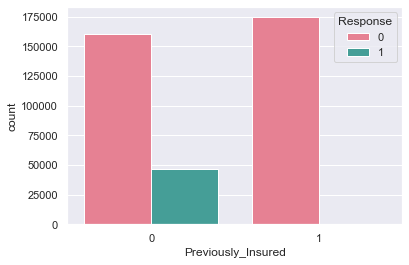

In [15]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')
cls()
P_val_cout = data['Previously_Insured'].value_counts()
print(P_val_cout)

0 - Customer doesn't have Vehicle Insurance

1 - Customer already has Vehicle Insurance

* Customer who are not perviosly insured are likely to be inetrested

### Vehicle_Age Vs Response

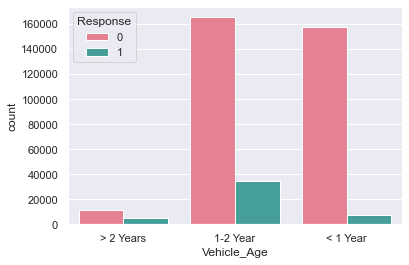

In [16]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')
cls()

0 - Customer didn't get his/her vehicle damaged in the past

1 - Customer got his/her vehicle damaged in the past

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

### Annual_Premium

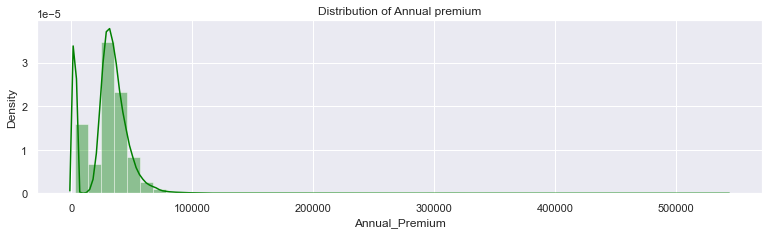

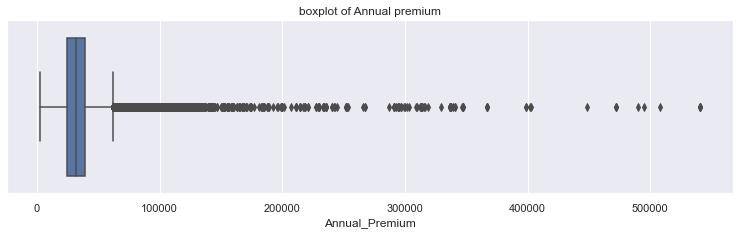

In [17]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")

plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
cls()

* From the distribution plot we can infer that the annual premimum variable is right skewed
* From the boxplot we can observe lot of outliers in the variable

### Correlation Matrix

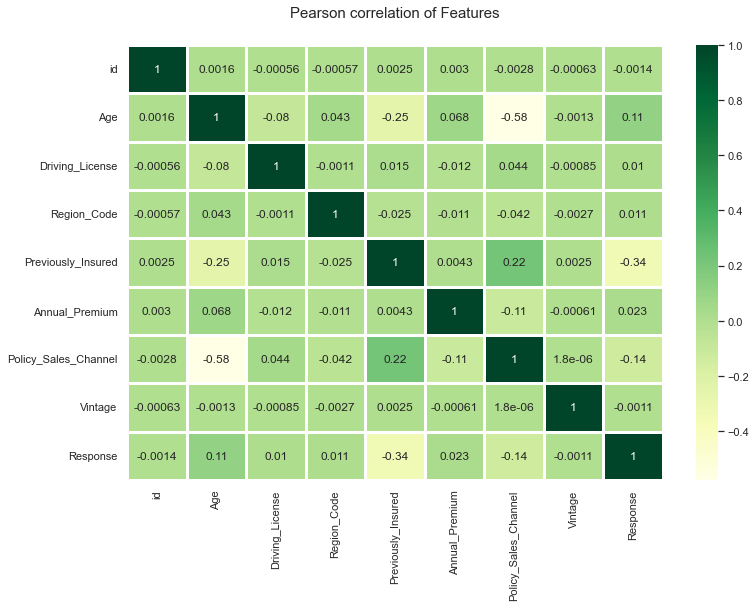

In [18]:
corr = data.corr()

f, ax = plt.subplots(figsize=(12,8))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)
cls()

*  Target variable is not much affected by Vintage variable. we can drop least correlated variable.

## 3. Feature Enginnering

### Label encoding

* The values present in column 'Gender', 'Vehicle_Age', 'Vehicle_damage' is in binary formate Yes or No and 0 & 1, So we can perform Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [21]:
data.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

* Now our all columns is in numerical data type

### Checking duplicate rows

In [22]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


* there is no duplicated rows in the dataset

### Seprating dependent and independent variables

In [23]:
X = data.drop(['Response'],axis=1)   #contain all  independent variable
Y = data['Response']                 #dependent variable

### Feature Selection

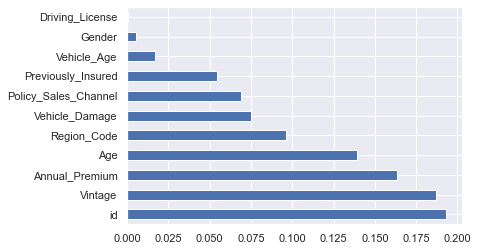

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)  #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
cls()

* We can remove less important features from the data set

### Handling Imbalanced data
* When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

0    334399
1     46710
Name: Response, dtype: int64

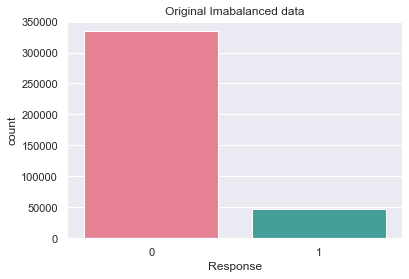

In [27]:
sns.countplot(Y, palette='husl')
plt.title('Original Imabalanced data')
cls()
Y.value_counts()

* Using SMOTE (Synthetic Minority Oversampling Technique) technique to balanced the data it works's same as the concept KNN algorithm which is find the data category with it's closest neighbour with calculating it's distance

In [28]:
from imblearn.over_sampling import SMOTE

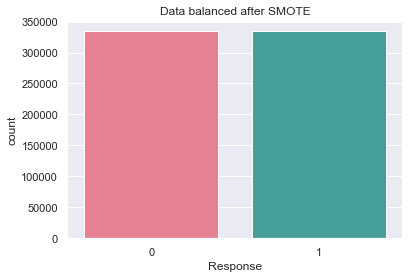

In [29]:
smote = SMOTE()
X_new,Y_new = smote.fit_resample(X,Y)

sns.countplot(Y_new, palette='husl')
plt.title('Data balanced after SMOTE')
cls()

### Splitting the dataset into Train data And Test data

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_new, Y_new, test_size=0.30, random_state=0)

print("Original Data size :", X.shape)
print("Training Data size :", X_train.shape)
print("Testing Data size :", X_test.shape)

Original Data size : (381109, 11)
Training Data size : (468158, 11)
Testing Data size : (200640, 11)


### Feature Scaling

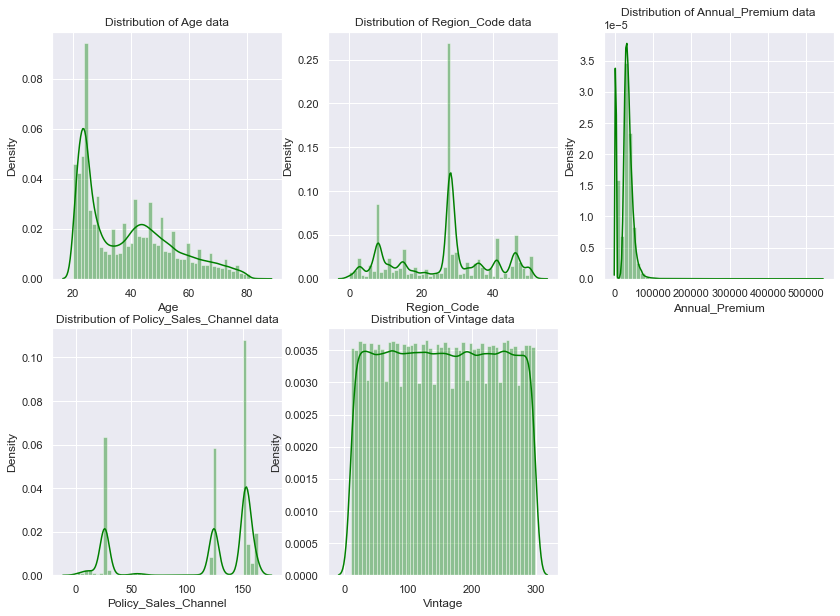

In [31]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.distplot(data['Age'],color='green')
plt.title('Distribution of Age data')

plt.subplot(2,3,2)
sns.distplot(data['Region_Code'],color='green')
plt.title('Distribution of Region_Code data')

plt.subplot(2,3,3)
sns.distplot(data['Annual_Premium'],color='green')
plt.title('Distribution of Annual_Premium data')

plt.subplot(2,3,4)
sns.distplot(data['Policy_Sales_Channel'],color='green')
plt.title('Distribution of Policy_Sales_Channel data')

plt.subplot(2,3,5)
sns.distplot(data['Vintage'],color='green')
plt.title('Distribution of Vintage data')

cls()

* As we see the distribution of the continues data is not normal distribution and in different range, to get a all continues data in same range we need to normalize the data
* if we use use Tree based model then we don't need normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler

# for normalization we use min-max scaling

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

X_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.437899,0.0,0.015385,1.0,0.903846,0.0,0.5,1.0,0.058872,0.981481,0.055363
1,0.568752,0.0,0.400000,1.0,0.660373,0.0,0.0,1.0,0.063165,0.154321,0.456747
2,0.975199,0.0,0.107692,1.0,0.692308,1.0,0.5,0.0,0.055256,0.932099,0.733564
3,0.559718,0.0,0.261538,1.0,0.175956,0.0,0.0,1.0,0.000000,0.611776,0.276817
4,0.968901,0.0,0.723077,1.0,0.750000,1.0,0.0,0.0,0.000000,0.222222,0.041522


* Now our data is ready to fit the model

## 4. Model Selection
* Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

* Dataset has more than 300k records

* cannot go with SVM Classifier as it takes more time to train as dataset increase

* Idea is to start selection of models as:

       1.Logistic Regression

       2.Random Forest

       3.XGBClassifier
   


In [33]:
# cross validation
#from sklearn.model_selection import cross_validate,cross_val_score

# Importing Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# import accuracy matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

###  1.Logistic Regression

In [34]:

#model Training
model_LR = LogisticRegression()
model_LR = model_LR.fit(X_train,Y_train)
train_prediction_LR = model_LR.predict(X_train)
test_prediction_LR = model_LR.predict(X_test)

# Evaluate model on different accuracy metircs
train_accuracy_LR = accuracy_score(Y_train,train_prediction_LR)
test_accuracy_LR = accuracy_score(Y_test,test_prediction_LR)
# Recall
recall_LR = recall_score(Y_test,test_prediction_LR)
# Precision
precision_LR = precision_score(Y_test,test_prediction_LR)
# f1-score
f1_score_LR = f1_score(Y_test,test_prediction_LR)
# ROC-AUC score
roc_auc_score_LR = roc_auc_score(Y_test,test_prediction_LR)

print('Training accuracy with Logistic Regression :', round(train_accuracy_LR,2)*100,'%')
print('Test accuracy with Logistic Regression :', round(test_accuracy_LR,2)*100,'%')


Training accuracy with Logistic Regression : 79.0 %
Test accuracy with Logistic Regression : 79.0 %


In [35]:
print(classification_report(Y_test,test_prediction_LR))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76    100328
           1       0.73      0.91      0.81    100312

    accuracy                           0.79    200640
   macro avg       0.81      0.79      0.79    200640
weighted avg       0.81      0.79      0.79    200640



### 2.RandomForest Classifier

In [36]:
#model Training
model_RF = RandomForestClassifier()
model_RF = model_RF.fit(X_train,Y_train)
train_prediction_RF = model_RF.predict(X_train)
test_prediction_RF = model_RF.predict(X_test)

# Evaluate model on different accuracy metircs
train_accuracy_RF = accuracy_score(Y_train,train_prediction_RF)
test_accuracy_RF = accuracy_score(Y_test,test_prediction_RF)
# Recall
recall_RF = recall_score(Y_test,test_prediction_RF)
# Precision
precision_RF = precision_score(Y_test,test_prediction_RF)
# f1-score
f1_score_RF = f1_score(Y_test,test_prediction_RF)
# ROC-AUC score
roc_auc_score_RF = roc_auc_score(Y_test,test_prediction_RF)

print('Training accuracy with Random Forest :', round(train_accuracy_RF,2)*100,'%')
print('Test accuracy with Random Forest :', round(test_accuracy_RF,2)*100,'%')

Training accuracy with Random Forest : 100.0 %
Test accuracy with Random Forest : 89.0 %


In [37]:
print(classification_report(Y_test,test_prediction_RF))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    100328
           1       0.90      0.89      0.89    100312

    accuracy                           0.89    200640
   macro avg       0.89      0.89      0.89    200640
weighted avg       0.89      0.89      0.89    200640



### 3. XGBClassifier

In [38]:
#model Training
model_XGB = RandomForestClassifier()
model_XGB = model_XGB.fit(X_train,Y_train)
train_prediction_XGB = model_XGB.predict(X_train)
test_prediction_XGB = model_XGB.predict(X_test)

# Evaluate model on different accuracy metircs
train_accuracy_XGB = accuracy_score(Y_train,train_prediction_XGB)
test_accuracy_XGB = accuracy_score(Y_test,test_prediction_XGB)
# Recall
recall_XGB = recall_score(Y_test,test_prediction_XGB)
# Precision
precision_XGB = precision_score(Y_test,test_prediction_XGB)
# f1-score
f1_score_XGB = f1_score(Y_test,test_prediction_XGB)
# ROC-AUC score
roc_auc_score_XGB = roc_auc_score(Y_test,test_prediction_XGB)

print('Training accuracy with XGBoost :', round(train_accuracy_RF,2)*100,'%')
print('Test accuracy with XGBoost :', round(test_accuracy_RF,2)*100,'%')

Training accuracy with XGBoost : 100.0 %
Test accuracy with XGBoost : 89.0 %


In [39]:
print(classification_report(Y_test,test_prediction_RF))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    100328
           1       0.90      0.89      0.89    100312

    accuracy                           0.89    200640
   macro avg       0.89      0.89      0.89    200640
weighted avg       0.89      0.89      0.89    200640



* we can also use methods like ROC-AUC curve and Confusion Matrix to evaluate the model's accuracy

### Comparing the model

In [40]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[test_accuracy_LR,test_accuracy_RF,test_accuracy_XGB],"Recall":[recall_LR,recall_RF,recall_XGB],"Precision":[precision_LR,precision_RF,precision_XGB],
    'f1_score':[f1_score_LR,f1_score_RF,f1_score_XGB],"ROC_AUC":[roc_auc_score_LR,roc_auc_score_RF,roc_auc_score_XGB]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.789788,0.912812,0.732546,0.812804,0.789797
Randomforest,0.894288,0.890621,0.897186,0.893892,0.894288
XGBClassifier,0.894373,0.891229,0.896853,0.894032,0.894373


**For model selection we can also use K-fold cross validation technique**

* The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

* In next step we can use Gradient descent (Hyperparameter tunnig) method in which we can adjust the hyperparameter of the algorithm to get the accurate result

## Conclusion

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
* The variable such as Age, Previously_insured,Annual_premium  are more afecting the target variable.
* comparing ROC score and f1 score we can see that Random Forest model preforms.